<a href="https://colab.research.google.com/github/Vaidehi-9/ECON3916-33674-Statistical-Machine-Learning/blob/main/Assignment%201/%20Econ_3916_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Manual Data Construction
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item':'Recreation','Price_2016':400,'Price_2024':500},
]

In [14]:
# Define the "Machine" (Function)
def calculate_inflation(base, current):
    return ((current - base) / base) * 100

# Run the Loop
for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Chipotle Burrito: 53.33% Inflation
Recreation: 25.00% Inflation


In [15]:
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='ef2d505eb7284a52a07c876e73d6ce20')

# Fetch Series
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA') # Added Rent
chipotle_burrito = fred.get_series('CUSR0000SEHC') # Added Chipotle Burrito
recreation = fred.get_series('PCESV') # Added Recreation

In [16]:
import pandas as pd
df = pd.DataFrame({
    "Official CPI": official_cpi,
    "Tuition": tuition,
    "Rent": rent,
    "Chipotle Burrito": chipotle_burrito,
    "Recreation": recreation
})

In [17]:
df = df.dropna()

In [18]:
base_values = df[df.index.year == 2016].iloc[0]
df_indexed = (df / base_values) * 100

In [19]:
df_indexed[df_indexed.index.year == 2016].head()


,Official CPI,Tuition,Rent,Chipotle Burrito,Recreation
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000
2016-04-01,100.563850,100.692146,100.924580,100.795338,101.048596
2016-07-01,101.030498,101.254434,101.882756,101.740318,102.277099
2016-10-01,101.720583,101.875722,102.919095,102.683234,103.324958


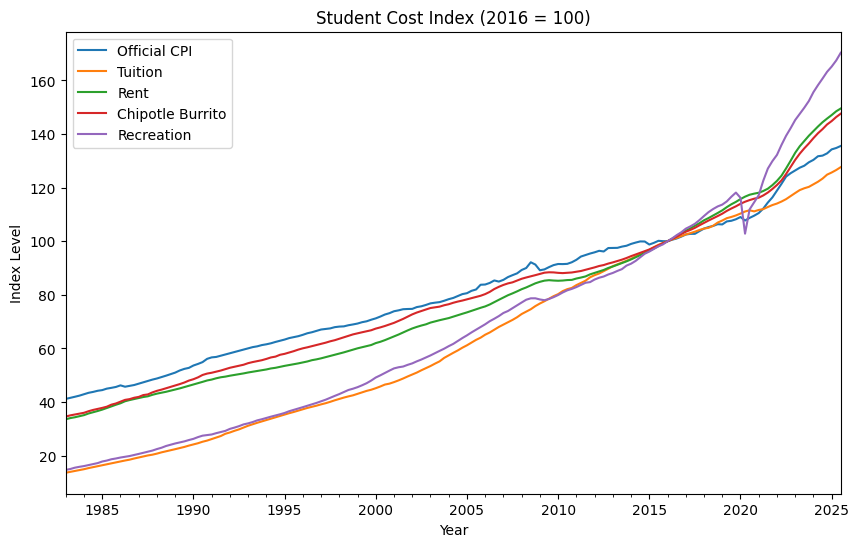

In [20]:
import matplotlib.pyplot as plt

df_indexed.plot(figsize=(10,6))
plt.title("Student Cost Index (2016 = 100)")
plt.ylabel("Index Level")
plt.xlabel("Year")
plt.show()


In [21]:
weights = {
    'Tuition': 0.4,
    'Rent': 0.4,
    'Chipotle Burrito': 0.1,
    'Recreation': 0.1
}

In [22]:
df_indexed['Student_SPI'] = df_indexed[list(weights.keys())].mul(pd.Series(weights)).sum(axis=1)

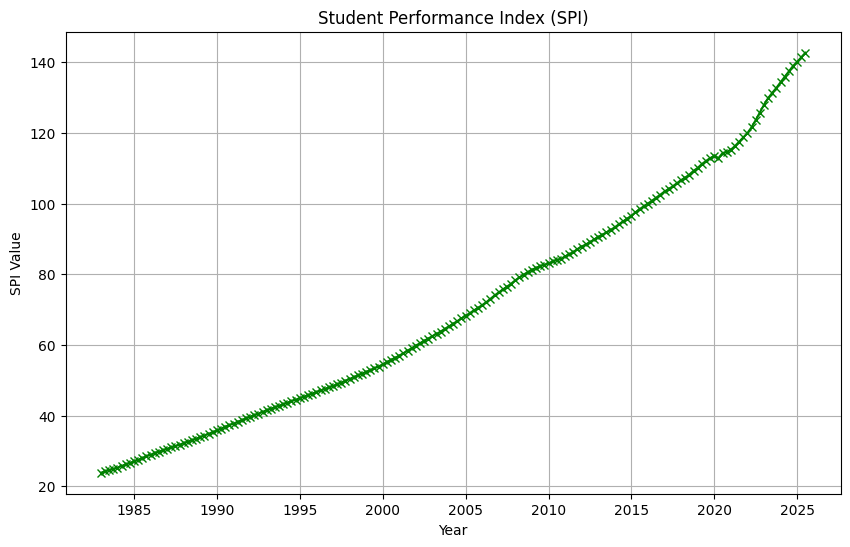

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_indexed.index, df_indexed['Student_SPI'],
         marker='x', linestyle='-', color='green')
plt
plt.title("Student Performance Index (SPI)")
plt.ylabel("SPI Value")
plt.xlabel("Year")
plt.grid(True)
plt.show()




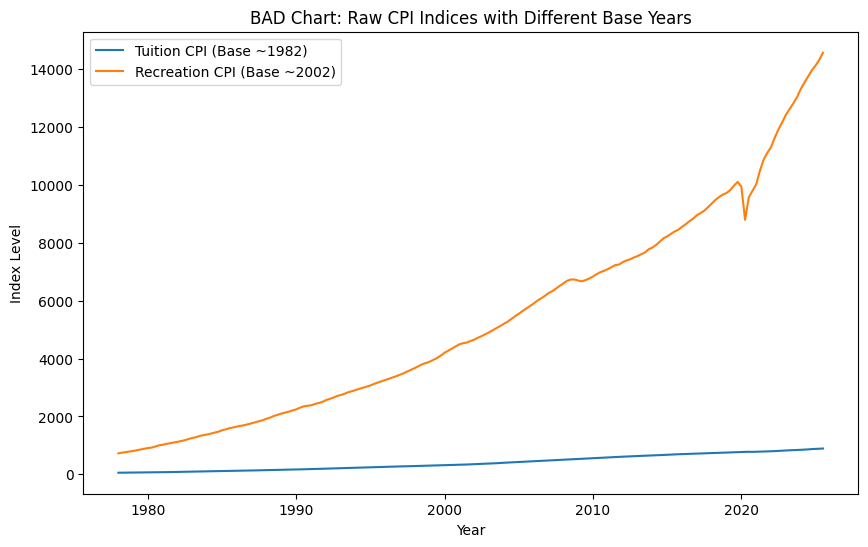

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df_raw = pd.DataFrame({
    'Tuition CPI': tuition,
    'Recreation / Streaming Proxy': recreation
}).dropna()

plt.figure(figsize=(10,6))
plt.plot(df_raw.index, df_raw['Tuition CPI'], label='Tuition CPI (Base ~1982)')
plt.plot(df_raw.index, df_raw['Recreation / Streaming Proxy'], label='Recreation CPI (Base ~2002)')
plt.title("BAD Chart: Raw CPI Indices with Different Base Years")
plt.ylabel("Index Level")
plt.xlabel("Year")
plt.legend()
plt.show()


Comparing raw indices with different base years is a 'data crime' because raw indices measure the percent changes from their specific base years, not comparable price levels. It would be like measuring inches to centimeters, so it's important to normalize.  

Fetching Boston CPI data...


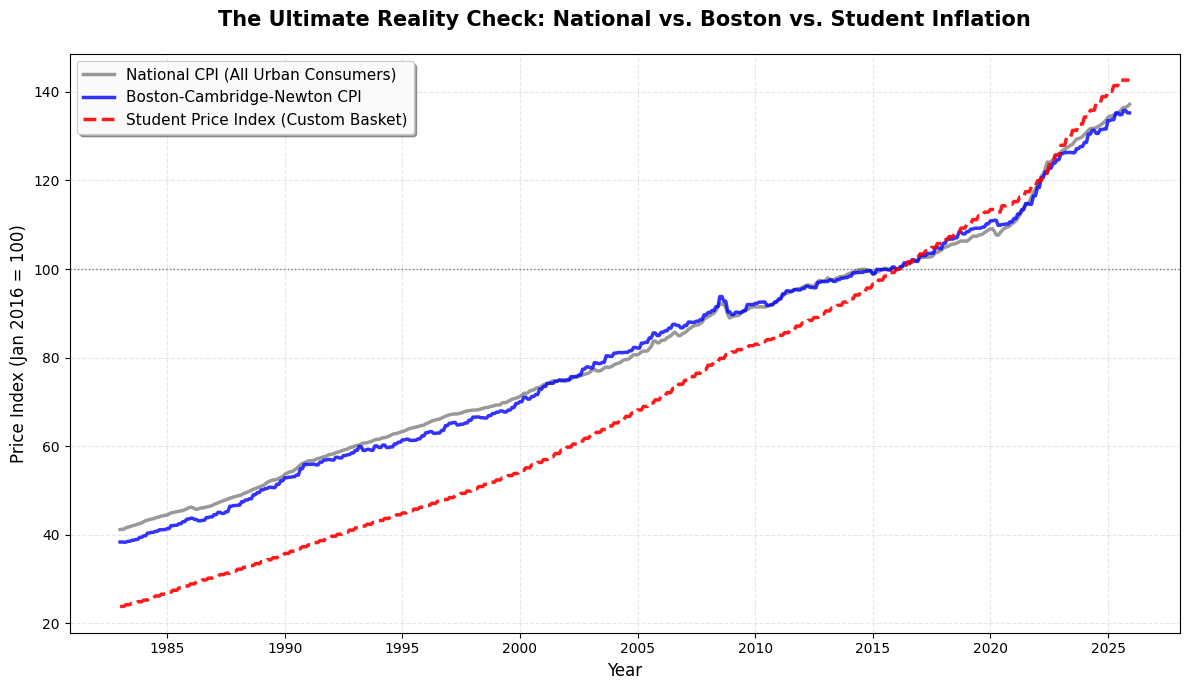


REALITY CHECK: How Much Worse Is It For You?

Latest Index Values (as of Dec 2025):
  National CPI:     137.19
  Boston CPI:       135.25
  Student SPI:      142.66

Cumulative Inflation Since Jan 2016:
  National:  37.2%
  Boston:    35.3%
  Student:   42.7%

Your 'Hidden Tax' (Student vs. National):
  +5.5 percentage points MORE inflation than official CPI!

Boston Premium (Boston vs. National):
  +-1.9 percentage points


In [25]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt

# Initialize FRED API (using your existing API key)
fred = Fred(api_key='ef2d505eb7284a52a07c876e73d6ce20')

# Fetch Boston-Cambridge-Newton CPI
# FRED Code: CUURA103SA0 (All items in Boston-Cambridge-Newton, MA-NH)
print("Fetching Boston CPI data...")
boston_cpi = fred.get_series('CUURA103SA0')

# Create DataFrame with all three series
df_comparison = pd.DataFrame({
    'National_CPI': official_cpi,  # From your earlier code
    'Boston_CPI': boston_cpi,
    'Student_SPI': df_indexed['Student_SPI']  # Your custom weighted index
})

# Handle missing values (forward fill for any gaps)
df_comparison = df_comparison.ffill().dropna()

# Re-index all series to Jan 1, 2016 = 100
base_date = pd.Timestamp('2016-01-01')
# Get the first available value on or after Jan 1, 2016
base_values = df_comparison[df_comparison.index >= base_date].iloc[0]

# Normalize all series to base year 2016 = 100
df_comparison_indexed = (df_comparison / base_values) * 100

# Create the three-line comparison plot
plt.figure(figsize=(12, 7))

plt.plot(df_comparison_indexed.index,
         df_comparison_indexed['National_CPI'],
         color='grey',
         linewidth=2.5,
         label='National CPI (All Urban Consumers)',
         alpha=0.8)

plt.plot(df_comparison_indexed.index,
         df_comparison_indexed['Boston_CPI'],
         color='blue',
         linewidth=2.5,
         label='Boston-Cambridge-Newton CPI',
         alpha=0.8)

plt.plot(df_comparison_indexed.index,
         df_comparison_indexed['Student_SPI'],
         color='red',
         linewidth=2.5,
         linestyle='--',
         label='Student Price Index (Custom Basket)',
         alpha=0.9)

# Formatting
plt.title('The Ultimate Reality Check: National vs. Boston vs. Student Inflation',
          fontsize=15, fontweight='bold', pad=20)
plt.ylabel('Price Index (Jan 2016 = 100)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend(loc='upper left', fontsize=11, framealpha=0.95, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.axhline(y=100, color='black', linestyle=':', linewidth=1, alpha=0.5)
plt.tight_layout()

plt.show()

# Evaluation: Summary Statistics
print("\n" + "="*60)
print("REALITY CHECK: How Much Worse Is It For You?")
print("="*60)
print(f"\nLatest Index Values (as of {df_comparison_indexed.index[-1].strftime('%b %Y')}):")
print(f"  National CPI:     {df_comparison_indexed['National_CPI'].iloc[-1]:.2f}")
print(f"  Boston CPI:       {df_comparison_indexed['Boston_CPI'].iloc[-1]:.2f}")
print(f"  Student SPI:      {df_comparison_indexed['Student_SPI'].iloc[-1]:.2f}")

print(f"\nCumulative Inflation Since Jan 2016:")
print(f"  National:  {df_comparison_indexed['National_CPI'].iloc[-1] - 100:.1f}%")
print(f"  Boston:    {df_comparison_indexed['Boston_CPI'].iloc[-1] - 100:.1f}%")
print(f"  Student:   {df_comparison_indexed['Student_SPI'].iloc[-1] - 100:.1f}%")

print(f"\nYour 'Hidden Tax' (Student vs. National):")
hidden_tax = (df_comparison_indexed['Student_SPI'].iloc[-1] -
              df_comparison_indexed['National_CPI'].iloc[-1])
print(f"  +{hidden_tax:.1f} percentage points MORE inflation than official CPI!")

print(f"\nBoston Premium (Boston vs. National):")
boston_premium = (df_comparison_indexed['Boston_CPI'].iloc[-1] -
                  df_comparison_indexed['National_CPI'].iloc[-1])
print(f"  +{boston_premium:.1f} percentage points")
print("="*60)